In [14]:
import pandas as pd

# Step 2: Load the CSV file
df = pd.read_csv('/Users/zahranazemian/Desktop/Python/auto.csv')
df.head(5)

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


In [16]:
import numpy as np
df.replace("?", np.nan, inplace = True)
df.head(5)

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,NaN,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


In [27]:
df["horsepower"] = pd.to_numeric(df["horsepower"], errors="coerce")

df["horsepower"] = df["horsepower"].astype(int)

# Check the result
print(df["horsepower"].dtype) 

int64


Text(0.5, 1.0, 'horsepower bins')

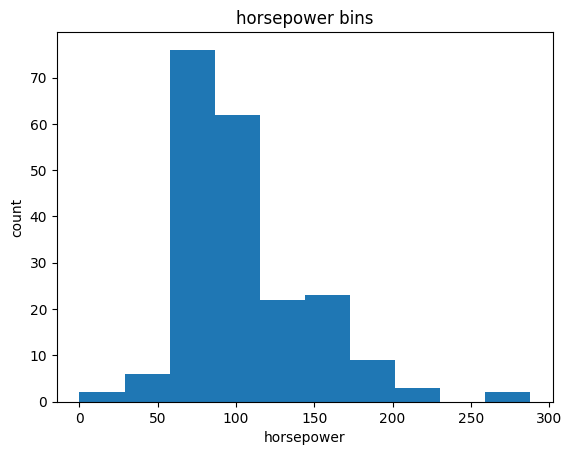

In [28]:
import matplotlib as plt
from matplotlib import pyplot
plt.pyplot.hist(df["horsepower"])

# set x/y labels and plot title
plt.pyplot.xlabel("horsepower")
plt.pyplot.ylabel("count")
plt.pyplot.title("horsepower bins")

In [36]:
bins = np.linspace(min(df["horsepower"]), max(df["horsepower"]), 4)
bins

array([  0.,  96., 192., 288.])

In [37]:
group_names = ['Low', 'Medium', 'High']

In [38]:
df['horsepower-binned'] = pd.cut(df['horsepower'], bins, labels=group_names, include_lowest=True)
df[['horsepower','horsepower-binned']].head(20)

,horsepower,horsepower-binned
0,111,Medium
1,111,Medium
2,154,Medium
3,102,Medium
4,115,Medium
5,110,Medium
6,110,Medium
7,110,Medium
8,140,Medium
9,160,Medium


In [44]:
bins = np.linspace(min(df["horsepower"]), max(df["horsepower"]), 5)
group_names = ['Low', 'Medium', 'High', 'super high']
df['horsepower-binned'] = pd.cut(df['horsepower'], bins, labels=group_names, include_lowest=True)
df[['horsepower','horsepower-binned']].head(10)


,horsepower,horsepower-binned
0,111,Medium
1,111,Medium
2,154,High
3,102,Medium
4,115,Medium
5,110,Medium
6,110,Medium
7,110,Medium
8,140,Medium
9,160,High


In [45]:
df["horsepower-binned"].value_counts()

horsepower-binned
Medium        110
Low            58
High           35
super high      2
Name: count, dtype: int64

Text(0.5, 1.0, 'horsepower bins')

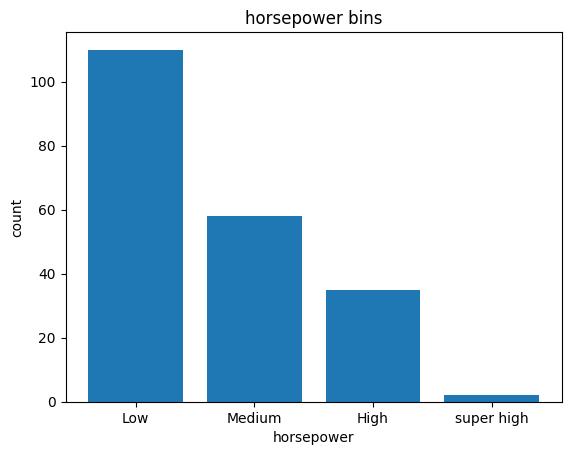

In [46]:
import matplotlib as plt
from matplotlib import pyplot
pyplot.bar(group_names, df["horsepower-binned"].value_counts())

# set x/y labels and plot title
plt.pyplot.xlabel("horsepower")
plt.pyplot.ylabel("count")
plt.pyplot.title("horsepower bins")